***`Download the module`***

In [1]:
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 53.7 MB/s eta 0:00:00


In [2]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=52c9c3f77a26dc7ba4b719a72a6097b5f540e2761f429ac6fb5b4fc5e7359257
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [3]:
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 10.0 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17395 sha256=2700fd9f2fcb95c13b074b7a9f9f3fb0d74c8a5ecea3b79f380899192321c390
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling

**import libraty**

In [4]:
# Importing necessary libraries
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import re
from bs4 import BeautifulSoup  # For handling HTML tags if any # Custom contractions map
from spellchecker import SpellChecker  # For spell checking
from langdetect import detect, LangDetectException
from googletrans import Translator
# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

## **Read the dataset**

In [5]:
# Load the dataset
df = pd.read_csv('/content/reviews_combinedfirst.csv')

# Display the first few rows of the dataframe to understand its structure
print(df.head())


           Username                            Review Date  \
0        Padi Takhu      Reviewed in India on 25 June 2023   
1           shubham  Reviewed in India on 16 November 2022   
2      Debasis Dhar    Reviewed in India on 15 August 2022   
3  Lakhan Lal Uraon  Reviewed in India on 11 November 2023   
4            Ruchit    Reviewed in India on 24 August 2023   

                                              Review  
0  If you would be building pc just for gaming an...  
1  This is one of the best cpu in budget if you o...  
2  Got this on sale for 7.26k.. Really enjoyed wi...  
3                                Performance is good  
4  Product is good but by looking at packaging an...  


# ***`DATA PREPROCESSING`***

In [6]:

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Initialize Spell Checker (optional)
spell_checker = SpellChecker()

translator = Translator()

# Define Contractions Dictionary
CONTRACTION_MAP = {
    "ain't": "is not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have",
    "'cause": "because", "could've": "could have", "couldn't": "could not", "couldn't've": "could not have",
    "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not",
    "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", "he'd": "he would",
    "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "he's": "he is",
    "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
    "i'd": "I would", "i'd've": "I would have", "i'll": "I will", "i'll've": "I will have",
    "i'm": "I am", "i've": "I have", "isn't": "is not", "it'd": "it would",
    "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "it's": "it is",
    "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have",
    "mightn't": "might not", "mightn't've": "might not have", "must've": "must have",
    "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not",
    "needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not",
    "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not",
    "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have",
    "she'll": "she will", "she'll've": "she will have", "she's": "she is",
    "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have",
    "so've": "so have", "so's": "so is", "that'd": "that would", "that'd've": "that would have",
    "that's": "that is", "there'd": "there would", "there'd've": "there would have",
    "there's": "there is", "they'd": "they would", "they'd've": "they would have",
    "they'll": "they will", "they'll've": "they will have", "they're": "they are",
    "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would",
    "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have",
    "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will",
    "what'll've": "what will have", "what're": "what are", "what's": "what is",
    "what've": "what have", "when's": "when is", "when've": "when have",
    "where'd": "where did", "where's": "where is", "where've": "where have",
    "who'll": "who will", "who'll've": "who will have", "who's": "who is",
    "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have",
    "won't": "will not", "won't've": "will not have", "would've": "would have",
    "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
    "y'all'd": "you all would", "y'all'd've": "you all would have", "y'all're": "you all are",
    "y'all've": "you all have", "you'd": "you would", "you'd've": "you would have",
    "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"
}

# Function to expand contractions
def expand_contractions(text, contraction_mapping):
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match) \
            if contraction_mapping.get(match) \
            else contraction_mapping.get(match.lower())
        expanded_contraction = first_char + expanded_contraction[1:]
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def preprocess_text(text):
    if isinstance(text, str):  # Check if the review is a string
        # Language detection
        try:
            lang = detect(text)
            print(f"Detected language: {lang}")
        except LangDetectException:
            lang = 'unknown'
            print("Could not detect language")

        # Translate to English if not already in English
        if lang != 'en' and lang != 'unknown':
            try:
                text = translator.translate(text, dest='en').text
                print(f"Translated text: {text}")
            except Exception as e:
                print(f"Error in translation: {e}")
                text = text  # If translation fails, keep the original text

        # Remove HTML tags (if any)
        text = BeautifulSoup(text, 'html.parser').get_text()

        # Expand contractions
        text = expand_contractions(text, CONTRACTION_MAP)

        # Remove non-alphabetic characters and convert to lowercase
        text = re.sub(r'[^a-zA-Z\s]', ' ', text)
        text = text.lower()

        # Tokenization
        words = word_tokenize(text)

        # Remove stopwords and lemmatize tokens
        words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words
                 if word not in set(stopwords.words('english'))]

        # Join words back into a sentence
        cleaned_text = ' '.join(words)

        # Spell checking (optional)
        words = [spell_checker.correction(word) for word in words]

        return cleaned_text
    else:
        return ''

def extract_country_date(review_date):
    country_match = re.search(r'Reviewed in (.*?) on', review_date)
    date_match = re.search(r'on (.*)', review_date)
    country = country_match.group(1) if country_match else None
    date = date_match.group(1) if date_match else None
    return country, date

# Apply the function to the "Review Date" column
df[['Country', 'Date']] = df['Review Date'].apply(lambda x: pd.Series(extract_country_date(x)))

# Function to get WordNet POS tags for lemmatization
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)  # Default to noun if not found

# Apply preprocessing to the 'Review' column
df['Cleaned_Review'] = df['Review'].apply(preprocess_text)

# Display the cleaned data
print(df[['Review', 'Cleaned_Review']].head())

# Save the preprocessed data back to a CSV file (optional)
df.to_csv('preprocessed_review.csv', index=False)


Detected language: en
Detected language: en
Detected language: en
Detected language: en
Detected language: en
Detected language: en
Detected language: en
Detected language: it
Translated text: 📋 📋 ⭐Description of the product⭐: the Intel® i3 12100F is a 12th generation processor, equipped with 4 high -performance high -performance coders and 8 threads, mounts on Schedemadri with LGA1700 attack, supports the DDR4 and DDR5 RAM, supports lawnressesPCI-E 5.0 and 4.0, has a system clock from a 3.3GHz minimum and up to 4.3GHz, has a minimum consumption of 60W and 89W paintings, we do not plan overclocking to further raise operational laphrequenza, but supports overclockingBoth Indr4 and DDR5 of the RAMs, this function allows him to earn the performances (especially in gaming) almost compared to the advance of the processor if it had been unlocked. This is in summary the synthesis of this processor, the web is full of much more technical reviews that chespierganoBecause the Intel i3 1200F is c

<ipython-input-6-18280c450ff9>:84: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


Detected language: en
Detected language: en
Detected language: en
Detected language: en
Detected language: en
Detected language: en
Detected language: id
Translated text: Super
Detected language: fr
Translated text: Best deal rs.13200
Detected language: en
Detected language: en
Detected language: en
Detected language: en
Detected language: en
Detected language: en
Detected language: en
Detected language: en
Detected language: en
Detected language: de
Translated text: SEAL BROKEN
Detected language: en
Detected language: en
Detected language: en
Detected language: so
Translated text: Good
Detected language: en
Detected language: en
Detected language: en
Detected language: en
Detected language: en
Detected language: en
Detected language: en
Detected language: hi
Translated text: There is a lot of money than the market rate, I7 comes for money, 11 generations come from the market.
Detected language: en
Detected language: en
Detected language: en
Detected language: es
Translated text: It is

# ***`EDA ON PREPROCESSED DATASET`***








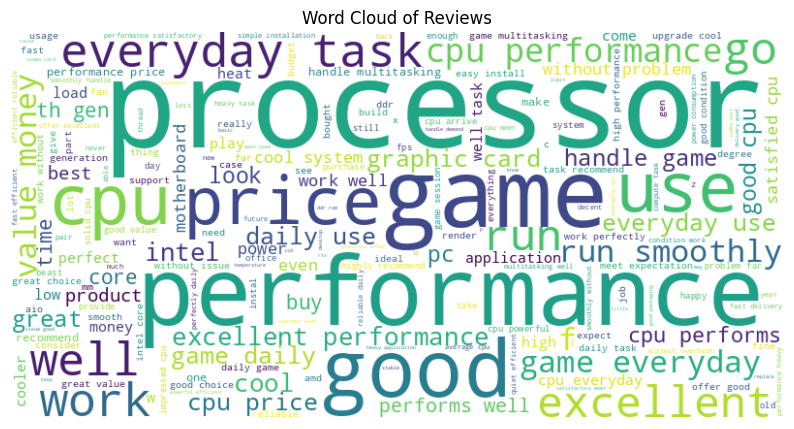

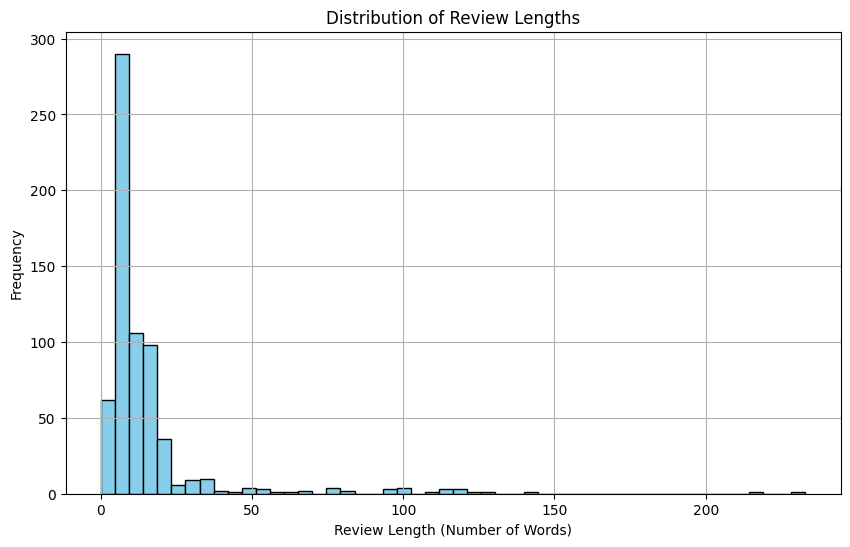

Number of Reviews: 656
Average Review Length: 15.22 words


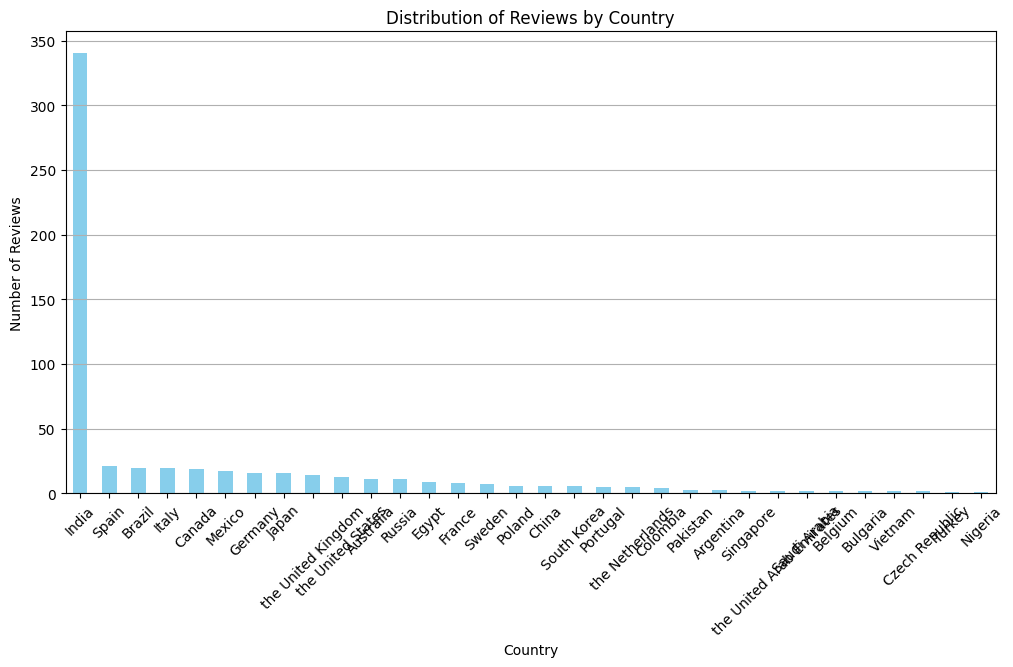

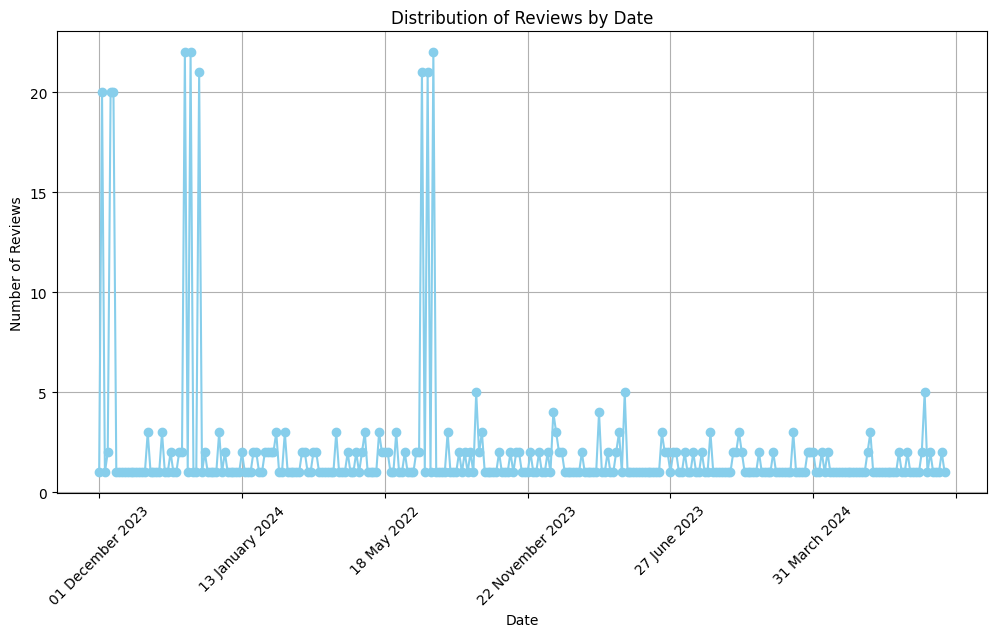

In [7]:
# Importing necessary libraries for EDA
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Load the preprocessed dataset
df = pd.read_csv('preprocessed_review.csv')

# Function to generate word clouds
def generate_word_cloud(text_data):
    # Combine all cleaned reviews into a single string
    combined_text = ' '.join([str(item) for item in text_data])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', random_state=42).generate(combined_text)

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Reviews')
    plt.show()

# Function to visualize distribution of review lengths
def visualize_review_lengths(text_data):
    # Calculate lengths of each review
    review_lengths = [len(review.split()) if isinstance(review, str) else 0 for review in text_data]

    # Plot histogram of review lengths
    plt.figure(figsize=(10, 6))
    plt.hist(review_lengths, bins=50, color='skyblue', edgecolor='black')
    plt.xlabel('Review Length (Number of Words)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Review Lengths')
    plt.grid(True)
    plt.show()

# Function to print basic statistics
def print_basic_statistics(df):
    # Print basic statistics
    num_reviews = len(df)
    avg_review_length = df['Cleaned_Review'].apply(lambda x: len(str(x).split()) if not pd.isna(x) else 0).mean()

    print(f"Number of Reviews: {num_reviews}")
    print(f"Average Review Length: {avg_review_length:.2f} words")

# Function to visualize distribution of reviews by country
def visualize_reviews_by_country(df):
    # Count reviews by country
    country_counts = df['Country'].value_counts()

    # Plot bar chart of reviews by country
    plt.figure(figsize=(12, 6))
    country_counts.plot(kind='bar', color='skyblue')
    plt.xlabel('Country')
    plt.ylabel('Number of Reviews')
    plt.title('Distribution of Reviews by Country')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

# Function to visualize distribution of reviews by date
def visualize_reviews_by_date(df):
    # Count reviews by date
    date_counts = df['Date'].value_counts().sort_index()

    # Plot line chart of reviews by date
    plt.figure(figsize=(12, 6))
    date_counts.plot(kind='line', marker='o', color='skyblue')
    plt.xlabel('Date')
    plt.ylabel('Number of Reviews')
    plt.title('Distribution of Reviews by Date')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Perform EDA on the 'Cleaned_Review' column
cleaned_reviews = df['Cleaned_Review'].tolist()

# Generate word cloud
generate_word_cloud(cleaned_reviews)

# Visualize distribution of review lengths
visualize_review_lengths(cleaned_reviews)

# Print basic statistics
print_basic_statistics(df)

# Visualize distribution of reviews by country
visualize_reviews_by_country(df)

# Visualize distribution of reviews by date
visualize_reviews_by_date(df)


In [8]:
import pandas as pd
import datetime
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk # import nltk
# Load the preprocessed dataset
df = pd.read_csv('preprocessed_review.csv')


nltk.download('vader_lexicon')
# Function to perform sentiment analysis using TextBlob
def perform_sentiment_analysis(text_data):
    sentiment_scores = []
    for review in text_data:
        # Handle potential missing values
        if isinstance(review, str):
            blob = TextBlob(review)
            sentiment_scores.append(blob.sentiment.polarity)
        else:
            sentiment_scores.append(None) # Append None for missing reviews
    return sentiment_scores

# Function to perform sentiment analysis using VADER
def perform_vader_sentiment_analysis(text_data):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = []
    for review in text_data:
        # Handle potential missing values
        if isinstance(review, str):
            sentiment_scores.append(sia.polarity_scores(review)['compound'])
        else:
            sentiment_scores.append(None) # Append None for missing reviews
    return sentiment_scores

# Function to extract month and year from date
def extract_month_year(date_str):
    if isinstance(date_str, str):
        try:
            date = datetime.datetime.strptime(date_str, '%d %B %Y')
            return date.month, date.year
        except ValueError:
            return None, None
    else:
        return None, None

# Function to calculate time since review
def calculate_time_since_review(review_date):
    if isinstance(review_date, str):
        try:
            review_date = datetime.datetime.strptime(review_date, '%d %B %Y')
            current_date = datetime.datetime.now()
            time_delta = current_date - review_date
            return time_delta.days  # Return days since review
        except ValueError:
            return None
    else:
        return None

# Perform sentiment analysis using TextBlob
df['TextBlob_Sentiment'] = perform_sentiment_analysis(df['Cleaned_Review'])

# Perform sentiment analysis using VADER
df['VADER_Sentiment'] = perform_vader_sentiment_analysis(df['Cleaned_Review'])

# Extract month and year from 'Date' column
df['Month'], df['Year'] = zip(*df['Date'].apply(extract_month_year))

# Calculate time since review
df['Days_Since_Review'] = df['Date'].apply(calculate_time_since_review)

# Save the enriched dataset with new features
df.to_csv('enriched_reviews.csv', index=False)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


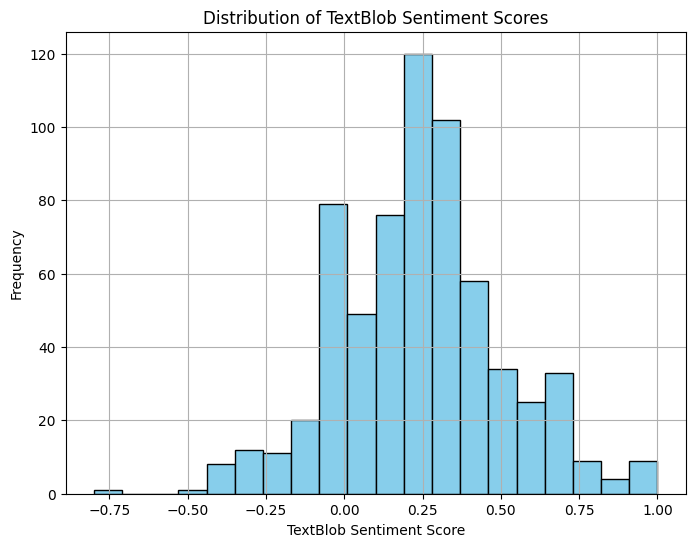

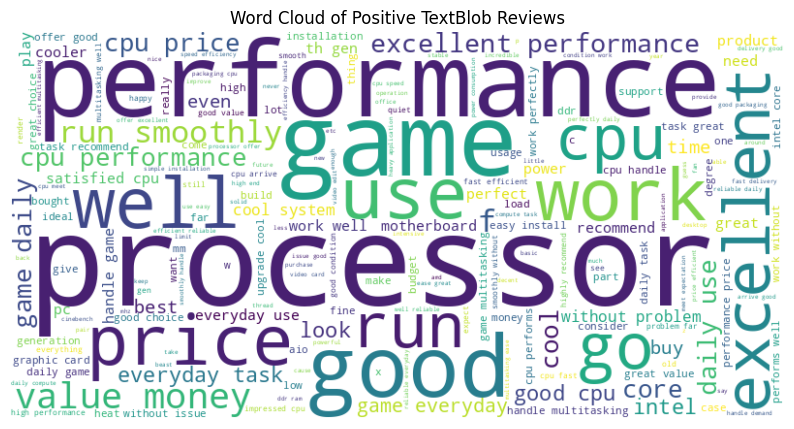

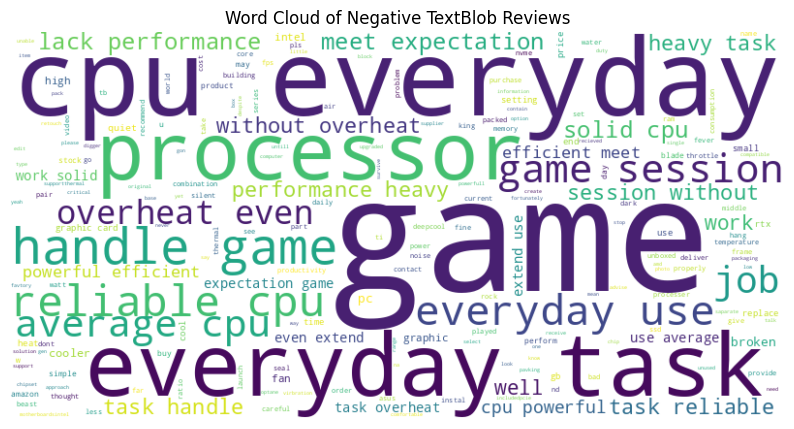

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Load the preprocessed dataset
df = pd.read_csv('enriched_reviews.csv')

# Function to generate word clouds for different sentiments
def generate_sentiment_word_clouds(df, sentiment_col, sentiment_label):
    # Filter reviews by sentiment
    positive_reviews = df[df[sentiment_col] > 0]['Cleaned_Review'].tolist()
    negative_reviews = df[df[sentiment_col] < 0]['Cleaned_Review'].tolist()

    # Generate word clouds for positive and negative sentiments
    generate_word_cloud(positive_reviews, f'Word Cloud of Positive {sentiment_label} Reviews')
    generate_word_cloud(negative_reviews, f'Word Cloud of Negative {sentiment_label} Reviews')

# Function to generate word clouds
def generate_word_cloud(text_data, title):
    # Combine all cleaned reviews into a single string
    combined_text = ' '.join([str(item) for item in text_data])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', random_state=42).generate(combined_text)

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Visualize sentiment distributions
def visualize_sentiment_distribution(df, sentiment_col, sentiment_label):
    plt.figure(figsize=(8, 6))
    plt.hist(df[sentiment_col], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(f'{sentiment_label} Sentiment Score')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {sentiment_label} Sentiment Scores')
    plt.grid(True)
    plt.show()

# Perform EDA on sentiment analysis features
# Example for TextBlob sentiment
visualize_sentiment_distribution(df, 'TextBlob_Sentiment', 'TextBlob')

# Generate word clouds for sentiment analysis
generate_sentiment_word_clouds(df, 'TextBlob_Sentiment', 'TextBlob')


# ***`TO FIND AND SELECT THE IMPORT FEATURES`***

In [10]:
from sklearn.ensemble import RandomForestClassifier
df['Cleaned_Review'] = df['Cleaned_Review'].fillna('')
# Assuming you have loaded your preprocessed dataset df
# Define X and y
X = df['Cleaned_Review']
y = df['TextBlob_Sentiment'].apply(lambda x: 'positive' if x > 0 else 'negative')

# Vectorize text data (example with TF-IDF Vectorizer)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_vec = vectorizer.fit_transform(X)

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_vec, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Print or visualize feature importances
feature_names = vectorizer.get_feature_names_out()
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Top 10 important features:")
print(feature_importance_df.head(10))
# Release Date	Cores	Threads	Lithography(nm)	Max. Turbo Freq.(GHz)	Base Freq.(GHz)	TDP(W)	Cache(MB)	Cache Info	Integrated Graphics

Top 10 important features:
           Feature  Importance
545           good    0.034405
913       overheat    0.027451
1048         quiet    0.025770
1291          task    0.024638
1137  satisfactory    0.023052
793           meet    0.022895
291            cpu    0.022872
520           game    0.022775
402      efficient    0.018740
852           need    0.017956


In [11]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

# Assuming you have loaded your preprocessed dataset df
# Define X and y
X = df['Cleaned_Review']
y = df['TextBlob_Sentiment'].apply(lambda x: 'positive' if x > 0 else 'negative')

# Vectorize text data (example with TF-IDF Vectorizer)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_vec = vectorizer.fit_transform(X)

# Train a Logistic Regression model
logreg_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
logreg_model.fit(X_vec, y)

# Use SelectFromModel to select features
selector = SelectFromModel(logreg_model, prefit=True)
selected_features = selector.get_support()

# Get feature names
feature_names = vectorizer.get_feature_names_out()
selected_feature_names = feature_names[selected_features]

print("Selected features:")
print(selected_feature_names)


Selected features:
['application' 'average' 'best' 'broken' 'do' 'efficiency' 'efficient'
 'excellent' 'fast' 'fine' 'fps' 'gb' 'get' 'good' 'graphic' 'great'
 'happy' 'impressed' 'lack' 'meet' 'multitasking' 'overheat' 'perfect'
 'performs' 'price' 'processor' 'quiet' 'run' 'satisfactory' 'satisfied'
 'smoothly']


# ***`CORRELATION MATRIX`***

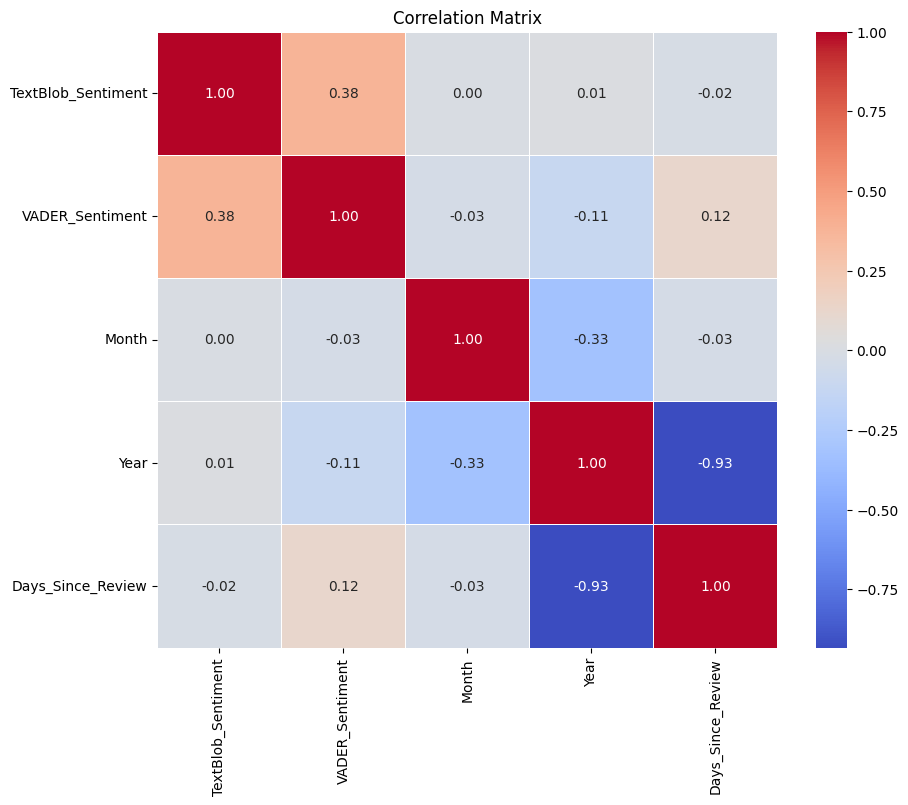

Highly correlated features:
{'Days_Since_Review'}


In [12]:
# Calculate correlation matrix, only including numerical columns
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Visualize correlation matrix (optional)
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Identify highly correlated features
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:  # Adjust threshold as needed
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

print("Highly correlated features:")
print(highly_correlated_features)


Top 10 important features:
           Feature  Importance
545           good    0.034405
913       overheat    0.027451
1048         quiet    0.025770
1291          task    0.024638
1137  satisfactory    0.023052
793           meet    0.022895
291            cpu    0.022872
520           game    0.022775
402      efficient    0.018740
852           need    0.017956


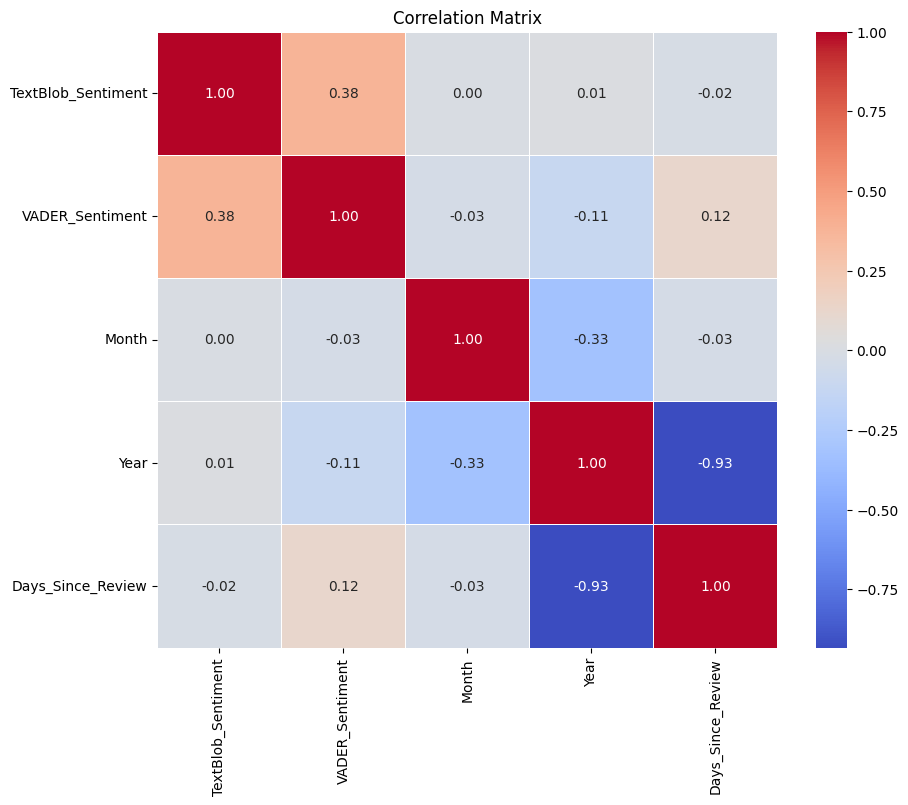

Highly correlated features:
{'Days_Since_Review'}


In [13]:
# Example Workflow: Feature Selection

# Assuming you have loaded your preprocessed dataset df and vectorized text data X_vec

# 1. Feature Importance Analysis with Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_vec, y)

feature_importances = rf_model.feature_importances_
feature_names = vectorizer.get_feature_names_out()
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Top 10 important features:")
print(feature_importance_df.head(10))

# 2. Correlation Analysis
correlation_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Identify and handle highly correlated features

# 3. Domain Knowledge
# Manually select or validate features based on domain knowledge

# Proceed with selected features for model building
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:  # Adjust threshold as needed
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

print("Highly correlated features:")
print(highly_correlated_features)

# ***`FEATURES SELECTION`***

Columns in the DataFrame: ['Username', 'Review Date', 'Review', 'Country', 'Date', 'Cleaned_Review', 'TextBlob_Sentiment', 'VADER_Sentiment', 'Month', 'Year', 'Days_Since_Review']
All specified features are present in the DataFrame.
Top 15 important features:
               Feature  Importance
0   TextBlob_Sentiment    0.537491
1      VADER_Sentiment    0.131217
34            overheat    0.033787
4    Days_Since_Review    0.029830
32                meet    0.025583
5                 good    0.021183
27                good    0.021031
39        satisfactory    0.020024
2                Month    0.017263
37               quiet    0.014705
22           excellent    0.010670
38                 run    0.010438
26                 get    0.009654
20           efficient    0.008995
21            everyday    0.008450


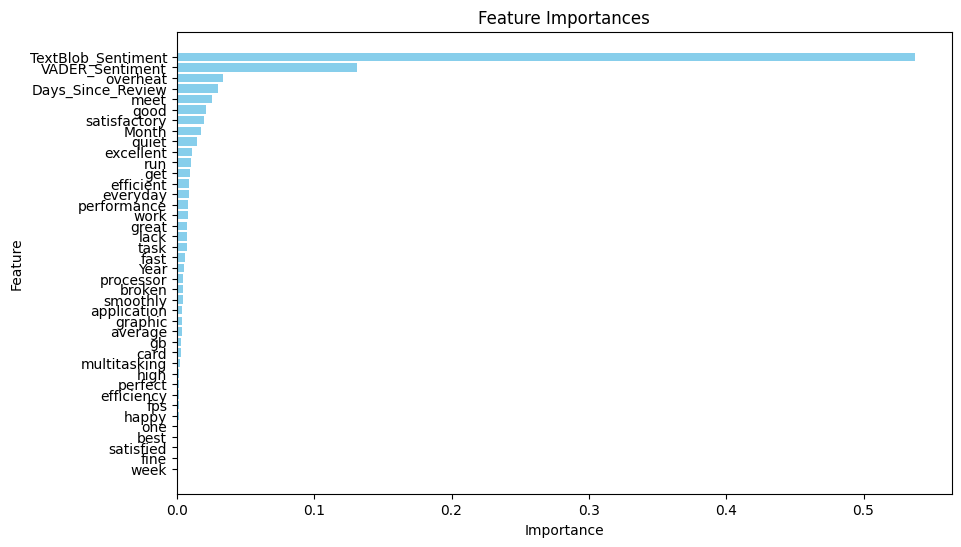

Selected Features for the model: ['TextBlob_Sentiment', 'VADER_Sentiment', 'overheat', 'Days_Since_Review', 'meet', 'good', 'good', 'satisfactory', 'Month', 'quiet', 'excellent', 'run', 'get', 'efficient', 'everyday']


In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('enriched_reviews.csv')

# Verify the columns in the DataFrame
print("Columns in the DataFrame:", df.columns.tolist())

# Define the list of important words from the feature importance analysis
important_words = ['good', 'broken', 'processor', 'work', 'performance', 'fps', 'week', 'graphic', 'one', 'card','application' ,'average' ,'best' ,'broken' ,'efficiency' ,'efficient' ,'everyday' ,'excellent' ,'fast' ,'fine', 'gb' ,'get' ,'good' , 'great','happy' ,'high' ,'lack' ,'meet' ,'multitasking' ,'overheat' ,'perfect' ,'processor' ,'quiet' ,'run' ,'satisfactory' ,'satisfied' ,'smoothly' ,'task']

# Create binary features for important words
for word in important_words:
    df[word] = df['Cleaned_Review'].apply(lambda x: 1 if word in str(x).split() else 0)

# Define the features and target variable
# Including sentiment scores and date-related features along with important words
features = ['TextBlob_Sentiment', 'VADER_Sentiment', 'Month', 'Year', 'Days_Since_Review'] + important_words

# Ensure all feature columns exist in the DataFrame
existing_features = [feature for feature in features if feature in df.columns]
missing_features = [feature for feature in features if feature not in df.columns]
if missing_features:
    print("Missing features in the DataFrame:", missing_features)
else:
    print("All specified features are present in the DataFrame.")

# Handle missing values by filling NaN with the mean value for numerical features
for feature in existing_features:
    if df[feature].dtype in ['int64', 'float64']:  # Check if the feature is numerical
        df[feature] = df[feature].fillna(df[feature].mean())

# Define the target variable
y = df['TextBlob_Sentiment'].apply(lambda x: 'positive' if x > 0 else 'negative')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[existing_features], y, test_size=0.2, random_state=42)

# Build and train a Random Forest model to determine feature importance
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': existing_features,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the top 10 important features
print("Top 15 important features:")
print(feature_importances.head(15))

# Visualize the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

# Select the top 10 important features
top_features = feature_importances.head(15)['Feature'].tolist()
print("Selected Features for the model:", top_features)

# Create a new DataFrame with only the top important features
X_selected = df[top_features]

# Save the DataFrame with selected features
X_selected.to_csv('selected_features.csv', index=False)


In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
df = pd.read_csv('enriched_reviews.csv')

# Extract the 'Cleaned_Review' and 'TextBlob_Sentiment' columns
text_data = df['Cleaned_Review'].fillna('')  # Ensure no NaN values in text data
target = df['TextBlob_Sentiment'].apply(lambda x: 1 if x > 0 else 0)  # Binary sentiment

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')

# Transform text data to TF-IDF features
X_tfidf = tfidf.fit_transform(text_data)

# Convert to DataFrame for easier manipulation
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())


# **`HYPERTUNING PARAMETERS`**

In [18]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV # Import GridSearchCV


def tune_parameters(X_train, y_train, model):
    """
    Perform hyperparameter tuning using GridSearchCV.

    Args:
    - X_train (array-like): Training features.
    - y_train (array-like): Training labels.
    - model: Classifier model object (e.g., RandomForestClassifier).

    Returns:
    - best_params (dict): Best parameters found by GridSearchCV.
    """
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    return best_params

best_params = tune_parameters(X_train, y_train, RandomForestClassifier())
print(best_params)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


# ***`TRAIN AND TEST MODAL`***

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_df, target, test_size=0.2, random_state=42)

# Define the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', random_state=42),
    "Naive Bayes": MultinomialNB()
}

best_model_name = None
best_model = None
best_accuracy = 0

# Train, evaluate, and save each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {name}")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")

    # Save the model
    joblib.dump(model, f'{name}_model.pkl')
    print(f"Model {name} saved as {name}_model.pkl")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name
        best_model = model

print(f"Best model ({best_model_name}) saved with accuracy: {best_accuracy}")


Model: Logistic Regression
Accuracy: 0.9015151515151515
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.38      0.55        21
           1       0.90      1.00      0.94       111

    accuracy                           0.90       132
   macro avg       0.95      0.69      0.75       132
weighted avg       0.91      0.90      0.88       132

Confusion Matrix:
 [[  8  13]
 [  0 111]]


Model Logistic Regression saved as Logistic Regression_model.pkl
Model: Random Forest
Accuracy: 0.8939393939393939
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.71      0.68        21
           1       0.94      0.93      0.94       111

    accuracy                           0.89       132
   macro avg       0.80      0.82      0.81       132
weighted avg       0.90      0.89      0.90       132

Confusion Matrix:
 [[ 15   6]
 [  8 103]]


Model Random Forest saved as Random For

In [20]:
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']